In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
from PIL import Image

img_dir = Path("figs")

# Introduction

## Motivation
- UQ for NNs

## Related Work
### Bayes NN

## Contributions of this work
- Uniqueness Analysis
- Framework to determine solver uncertainty
- 

## Outline of this Paper

## Problem Statement
- Diffusion-Sorption (experiment (cylinder) and equations)
- Maybe something about whether it is unique for the PDE
- Reasons why it is not unique for our numerical solver (FINN)
- Inverse Problem

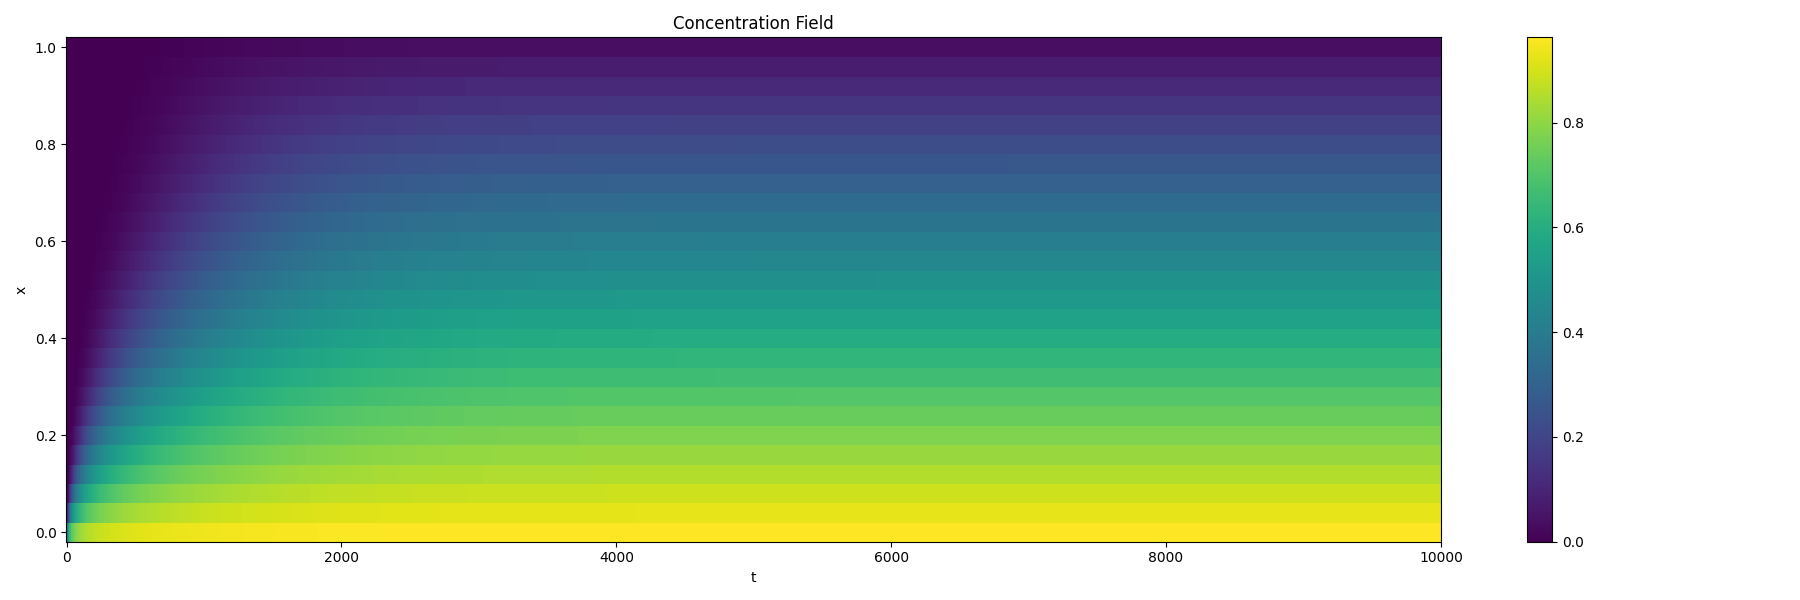

In [3]:
Image.open(img_dir / "c_diss_field_full.png")

In [4]:
# TODO
# Image.open(img_dir / "langmuir.png")

### Uniqueness of Inverse Problem

- Inverse Probleme müssen nicht zwangsweise eindeutig sein (TODO: Einfaches Beispiel das nicht eindeutig ist.)
- Statt das Problem rigorös mathematisch zu analysieren führen wir hier eine empirische Eindeutigkeitsanalyse durch, indem wir die PDE nach R(c) umstellen und die synthetischen Daten einsetzen.
- Die folgenden Ergebnisse deuten bis auf numerische Ungenauigkeiten auf eine Eindeutige Lösung für diese Daten hin.

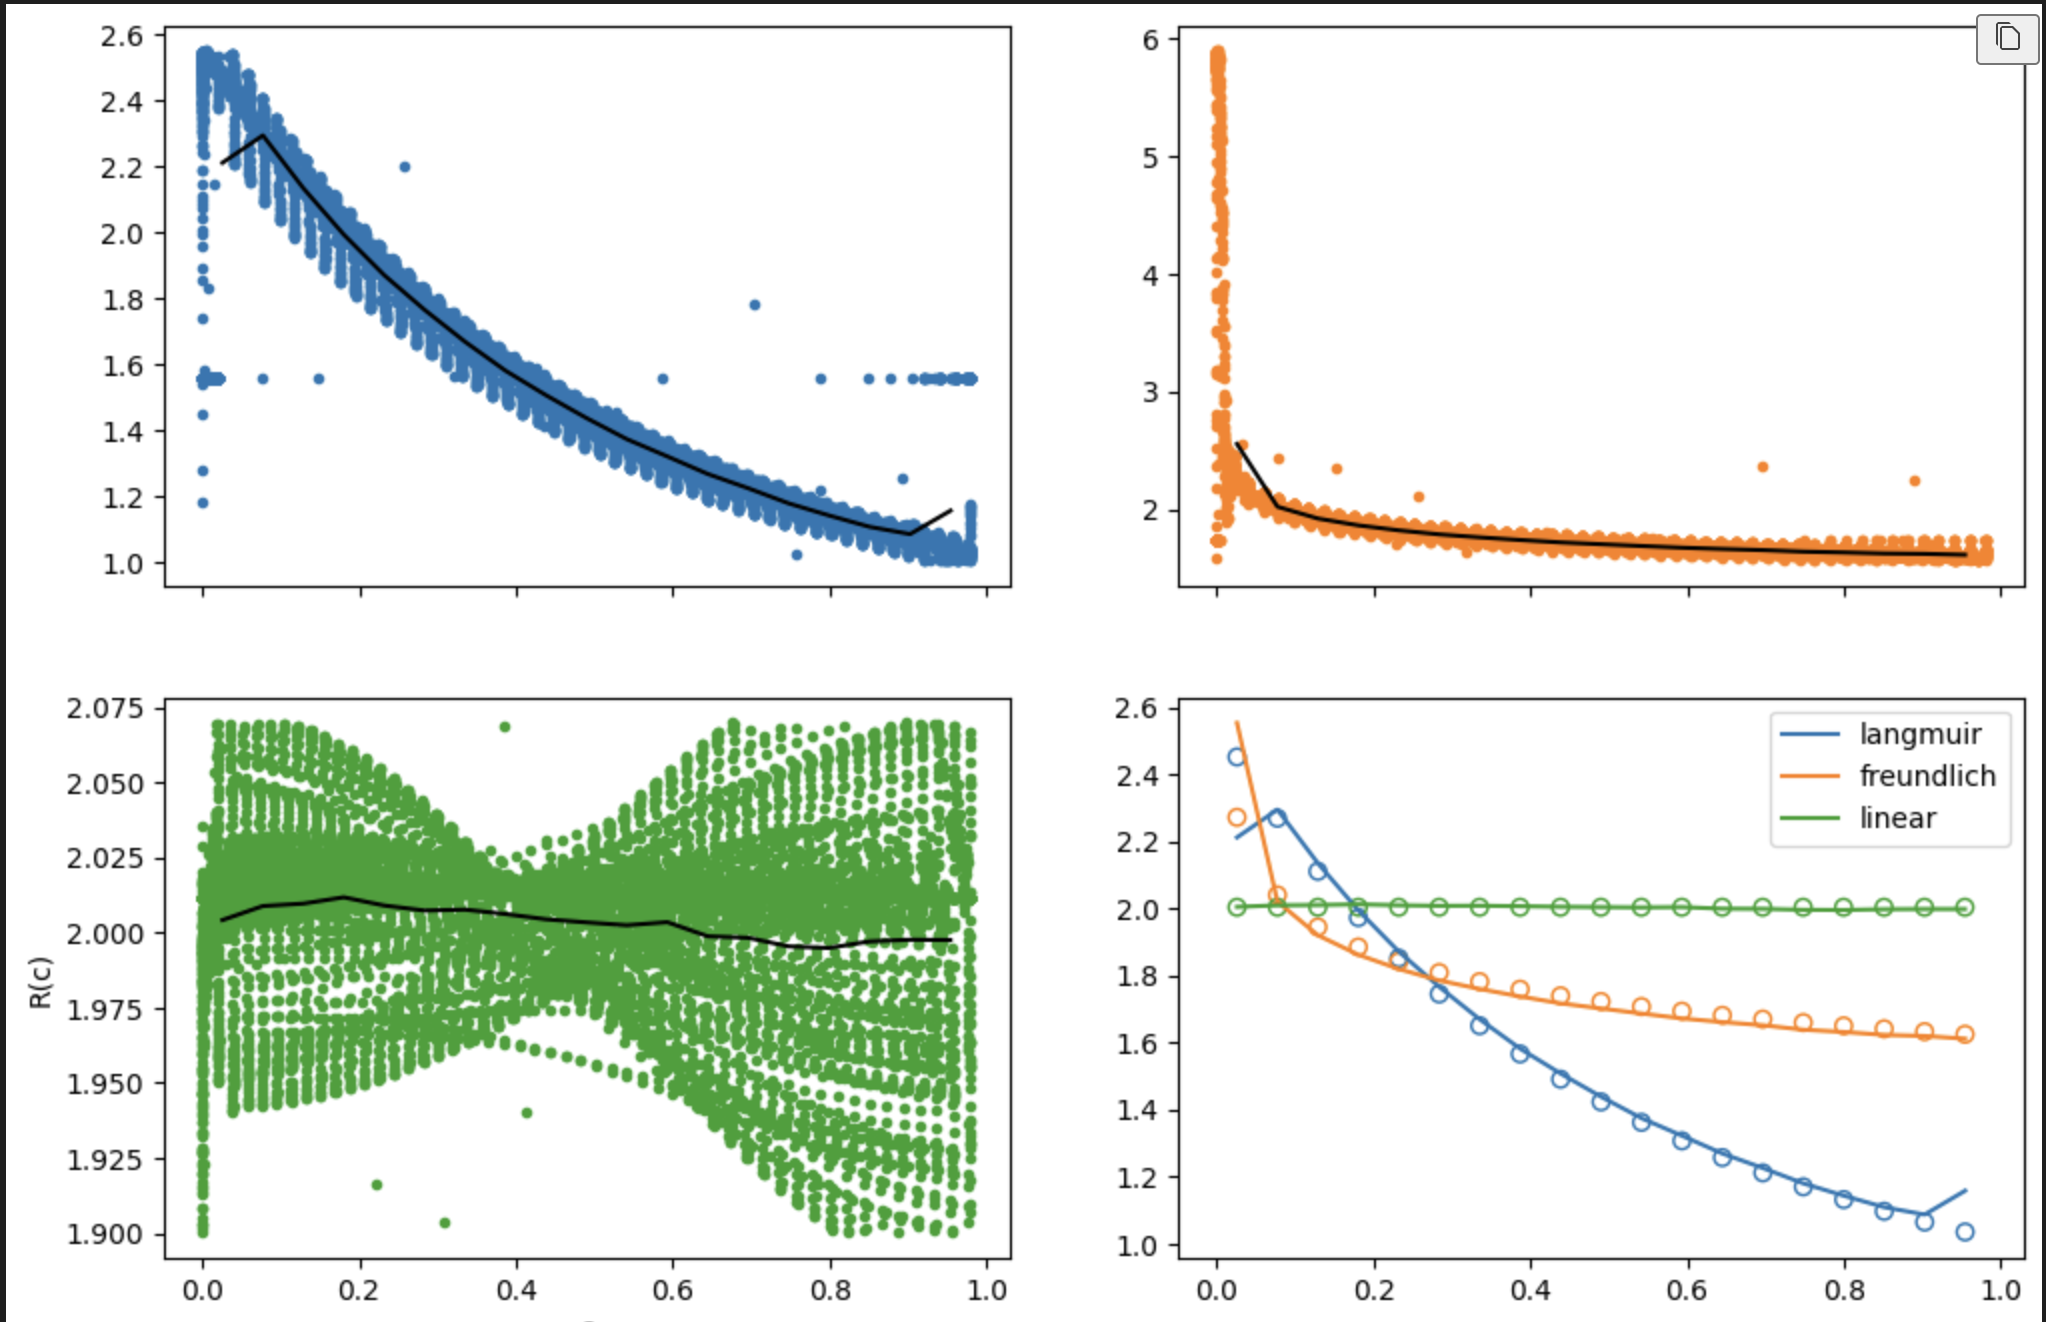

In [5]:
Image.open(img_dir / "ret_uniqueness.png")

Damit können wir die unterschiedlichen Lösungen auf zwei Faktoren runterbrechen:
- Löserunsicherheit
- Datenunsicherheit

Diese werden wir zuerst getrennt betrachten und dann kombinieren, um eine finale UQ zu bekommen.

# Foundational Methods

## FINN

## PI3NN

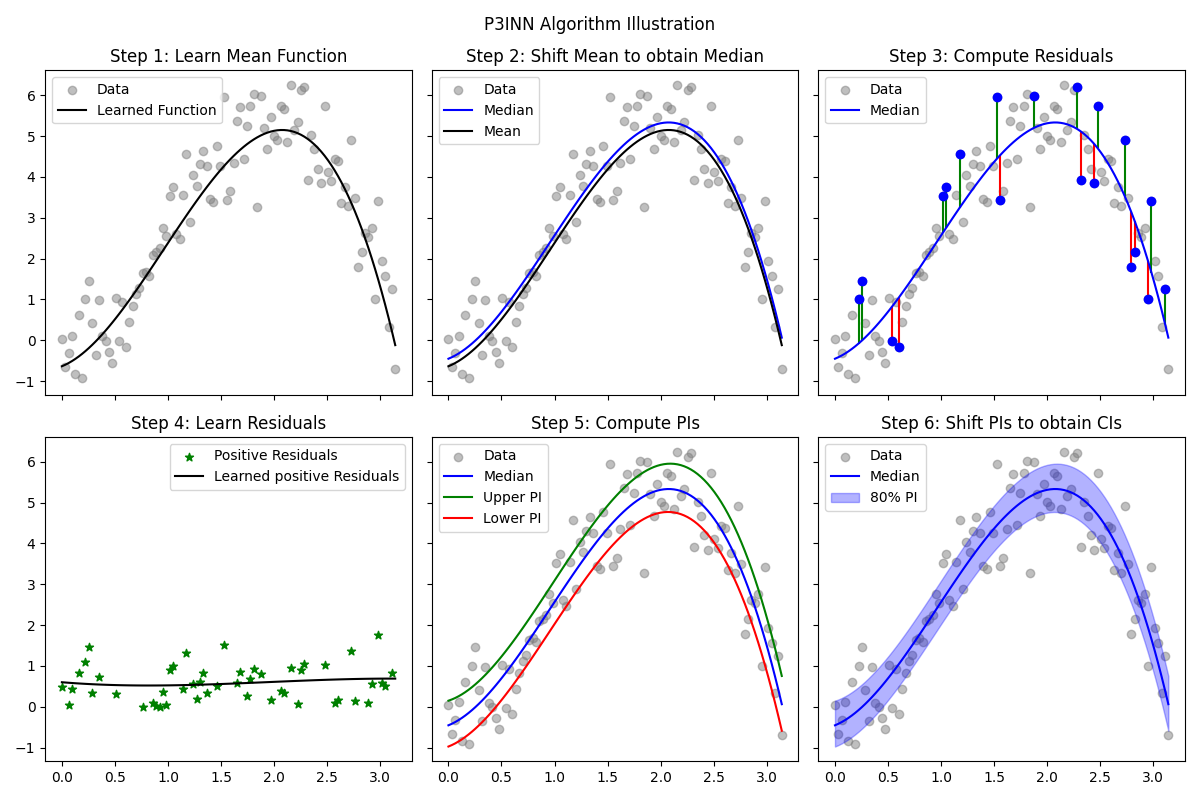

In [6]:
Image.open(img_dir / "3pinn_illustration.png")

# Methodology

## Approximating the Posterior Predictive Distribution via Hyperparameter Marginalization

Our goal is to obtain the posterior predictive distribution $p(y | x, D)$, which describes the probability of observing output $y$ given a new input $x$ and the training data $D$.  Directly computing this distribution is intractable for neural networks due to the complex relationship between hyperparameters, weights, and outputs.  We propose a method based on marginalizing over the hyperparameters and approximating the likelihood $p(D|h)$.

**Model Formulation:**

We denote our neural network as $f(x; w)$, where $x$ is the input and $w$ represents the network's weights. The weights are determined by a deterministic solver $S(h, D)$, which takes the hyperparameters $h$ and training data $D$ as input. We place a prior distribution $p(h)$ over the hyperparameters.

The posterior predictive distribution can be written as:

$$ p(y | x, D) = \int p(y | x, h, D) p(h|D) \, dh $$

where $p(h|D)$ is the posterior distribution over hyperparameters.

**Approximating the Likelihood:**

Calculating $p(h|D)$ requires evaluating the likelihood $p(D|h)$, which is generally intractable. We employ a point estimation approach to approximate this likelihood.  For a given $h$, we obtain a point estimate of the weights $w$ using our solver: $w = S(h, D)$. We then assume a Gaussian distribution for the output $y_i$ given input $x_i$, weights $w$, and hyperparameters $h$:

$$p(y_i | x_i, w, h) = \mathcal{N}(y_i | f(x_i; w), \sigma^2)$$

where $\sigma^2$ is the noise variance, which can be fixed or estimated from the data. The likelihood $p(D|h)$ is then approximated as:

$$p(D|h) \approx \prod_{i=1}^n \mathcal{N}(y_i | f(x_i; S(h,D)), \sigma^2)$$

where $n$ is the number of data points in $D$, and we assume conditional independence of the data points given $w$ and $h$.

**Importance Sampling:**

To sample from $p(y | x, D)$, we use importance sampling. We draw $M$ samples $\{h_m\}_{m=1}^M$ from the prior distribution $p(h)$. For each sample $h_m$, we compute the importance weight:

$$ \omega_m = \frac{p(D | h_m)}{p(D)} \propto p(D | h_m) $$

Since $p(D)$ is a constant, it can be omitted and the weights can be normalized later.

Limitations:

This method relies on several approximations.  The point estimation of the likelihood ignores the uncertainty in $w$ given $h$. The Gaussian assumption for the output distribution might not always be appropriate.  The effectiveness of importance sampling depends on the prior distribution $p(h)$ being sufficiently close to the true posterior $p(h|D)$.


This method provides a practical approach to approximate the posterior predictive distribution for neural networks. Future work could explore more sophisticated approximations for the likelihood, such as variational inference or Markov Chain Monte Carlo methods, to improve the accuracy of the estimated distribution.



## Assumptions
## SPAN (Systematic Perturbation Analysis of Networks)

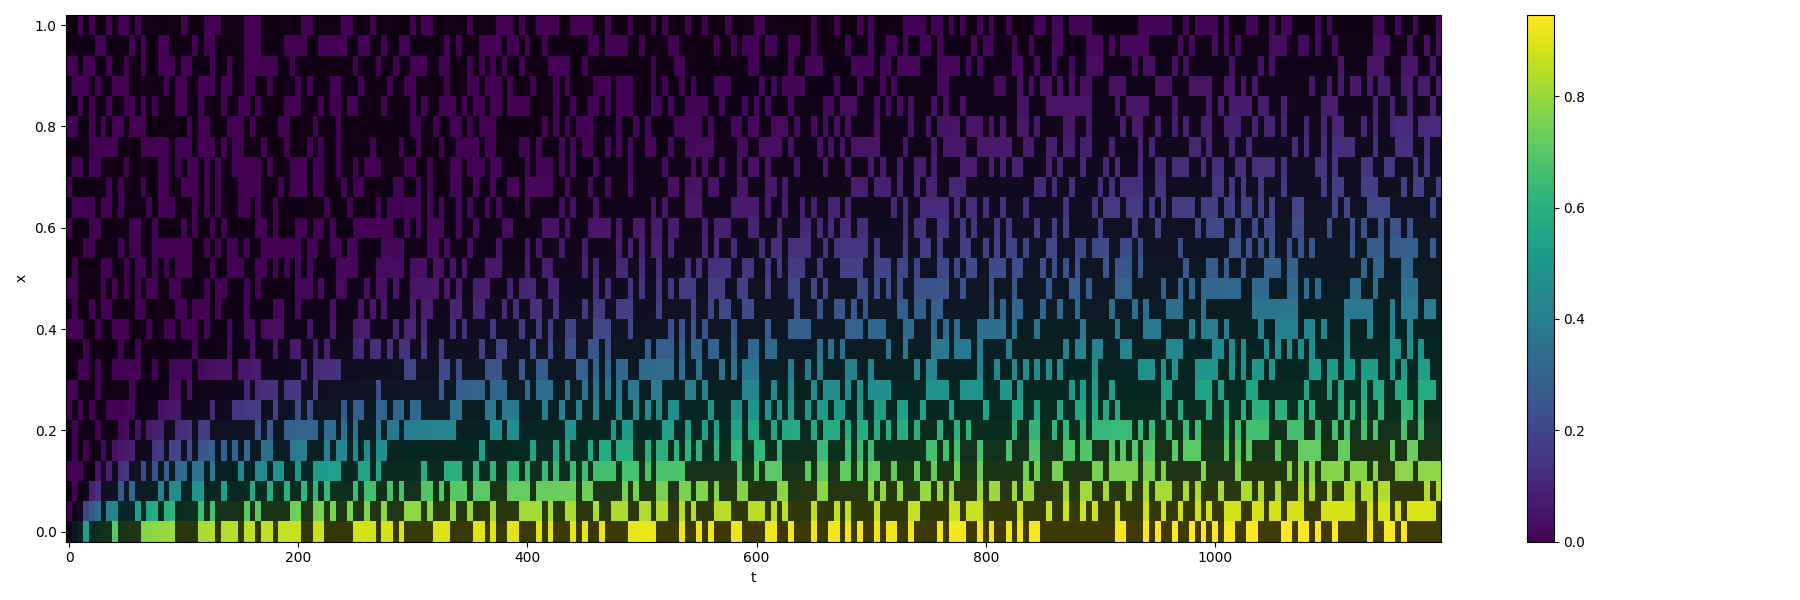

In [7]:
Image.open(img_dir / "c_diss_field_train_random_subset.png")

## PI3NN as Post-Processing
(auf Retardation)
- Retardation samples von SPAN geben mir eine stetige, aber nicht glatte W-keitverteilung
- PI3NN macht es glatt

## Data-SPAN
- PI3NN auf concentration data gibt mir C-Data-Quantile
- FINN auf C-Data-Quantile gibt mir C-Quantile und R-Verteilung

# Data and Setup
- Details on how the experiments were conducted, including parameters and environment.
# Experiments
## SPAN
## Data-SPAN
## Baselines
- Lists other methods used for comparison.

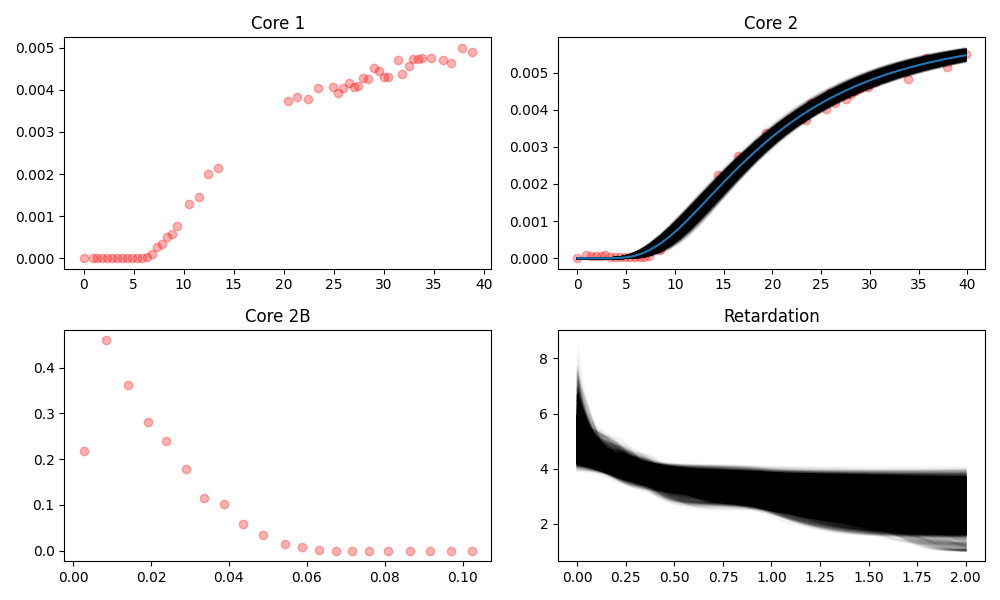

In [8]:
Image.open(img_dir / "finn_mcmc_samples.png")

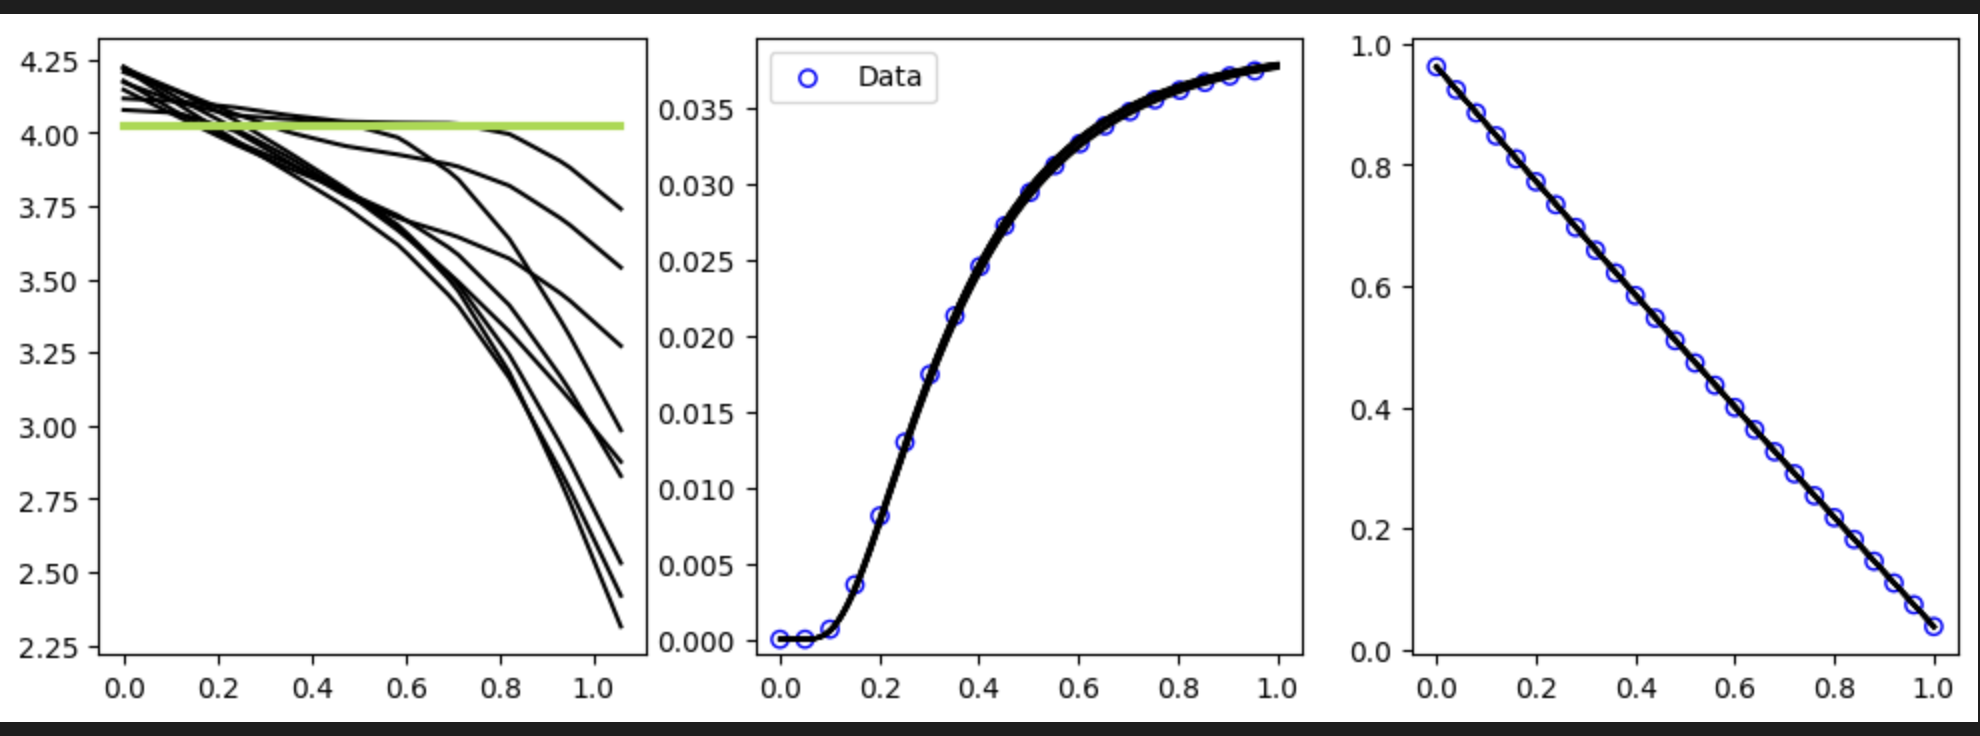

In [9]:
Image.open(img_dir / "random_retardations.png")

Caption:
- Left: Retardations which result in low full-field MSE ( < $10^{-5.5}$) and MAE ( < $5 \cdot 10^{-3}$). Fat: Concentration-producing retardation.
- Middle and Right: Concentration BTC and Profile for these Retardations.

Analysis:
- There are Rs that look significantly different but produce almost indistinguishable concentration at certain regions.
- The Error must come from another not-visible region. Thus, this error can not be detected in the case of experimental data as there is no access to the full field solution.

# Results
- Evaluation Metrics: Describes the metrics used to evaluate the performance.




## Runtime
## Param1
## Param2
## All Params
# Discussion

## Results
## Analysis: Interpretation of the results, discussing why the proposed method works or doesn't work.
# Discussion

## Synthetic Data

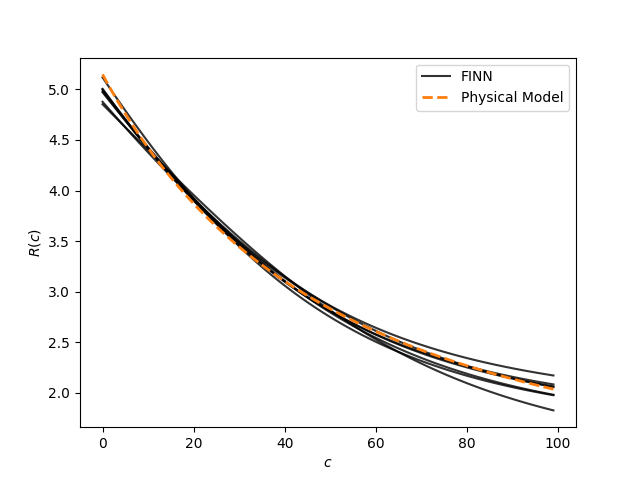

In [ ]:
# TODO: Warum sollte ich das separat haben? Vielleicht um später Ähnlichkeit mit experimentellen Daten aufzuzeigen? Weil synth + noise ist ja quasi exp. daten nur weniger daten
# Image.open(img_dir / "finn_synthetic_langmuir_c_noise.png")

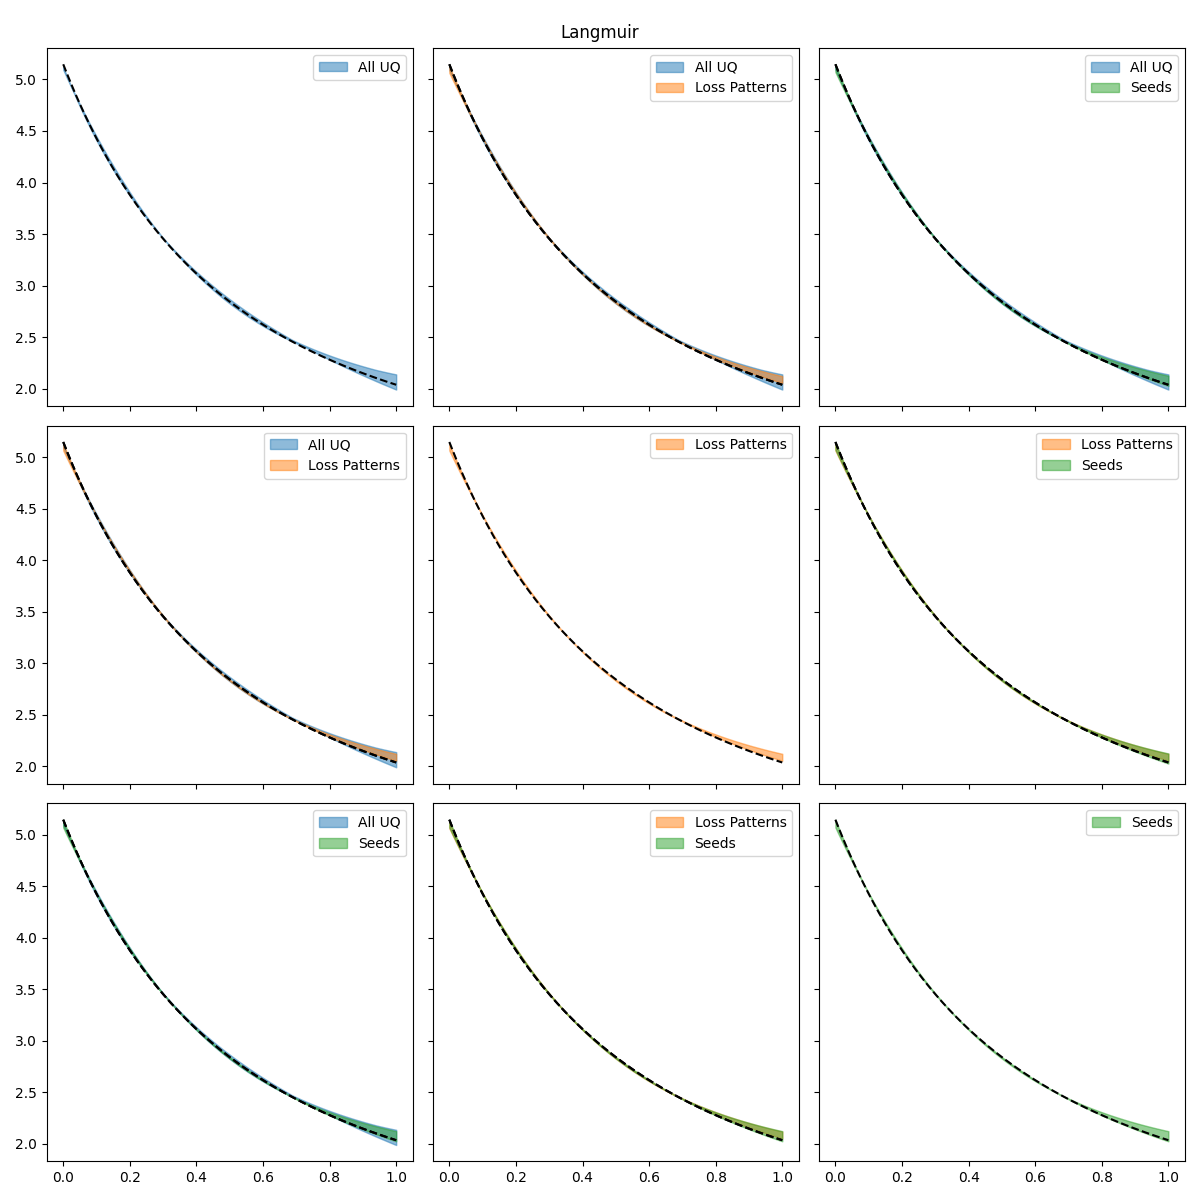

In [11]:
# Image.open(img_dir / "finn_synthetic_SPAN_factors_samples.png")  # TODO: maybe in Appendix?
Image.open(img_dir / "finn_synthetic_SPAN_factors_PIs.png")

### Data-SPAN

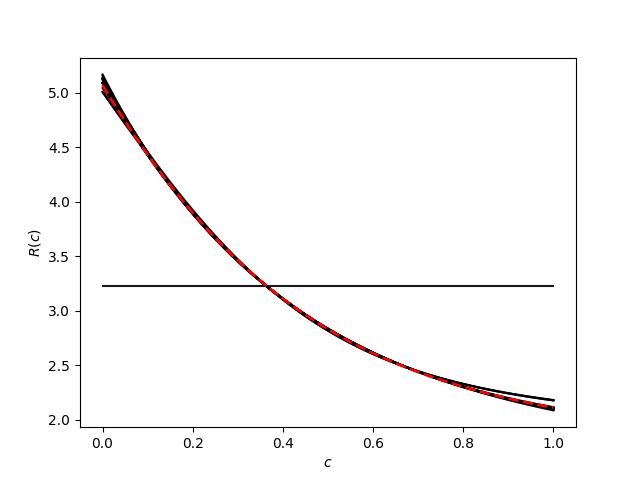

In [12]:
Image.open(img_dir / "finn_synthetic_langmuir_c_pi3nnError.png")

## Experimental Data (Core 2)

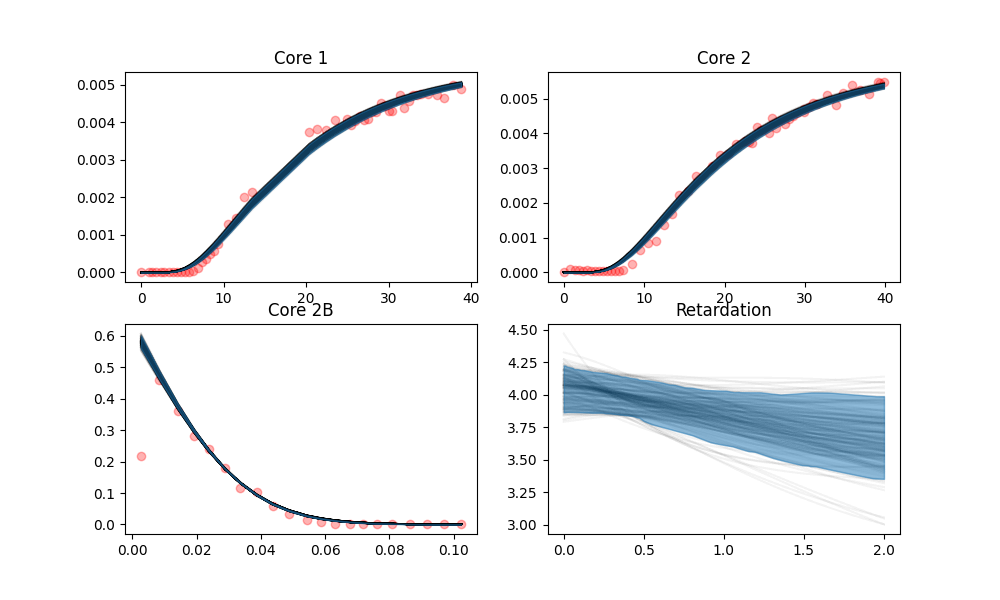

In [13]:
Image.open(img_dir / "finn_span_samples.png")

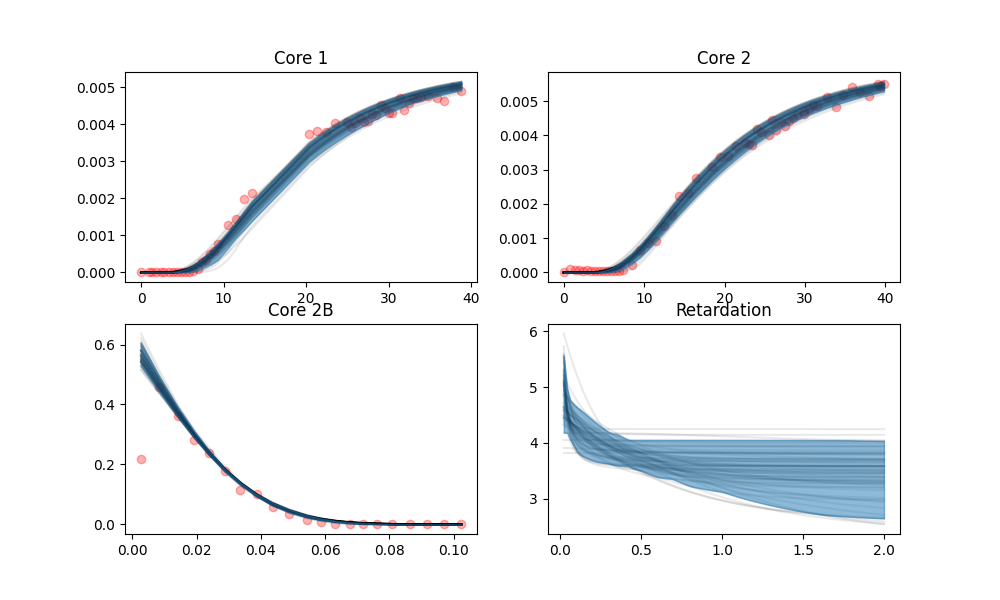

In [14]:
Image.open(img_dir / "finn_dataspan_samples.png")

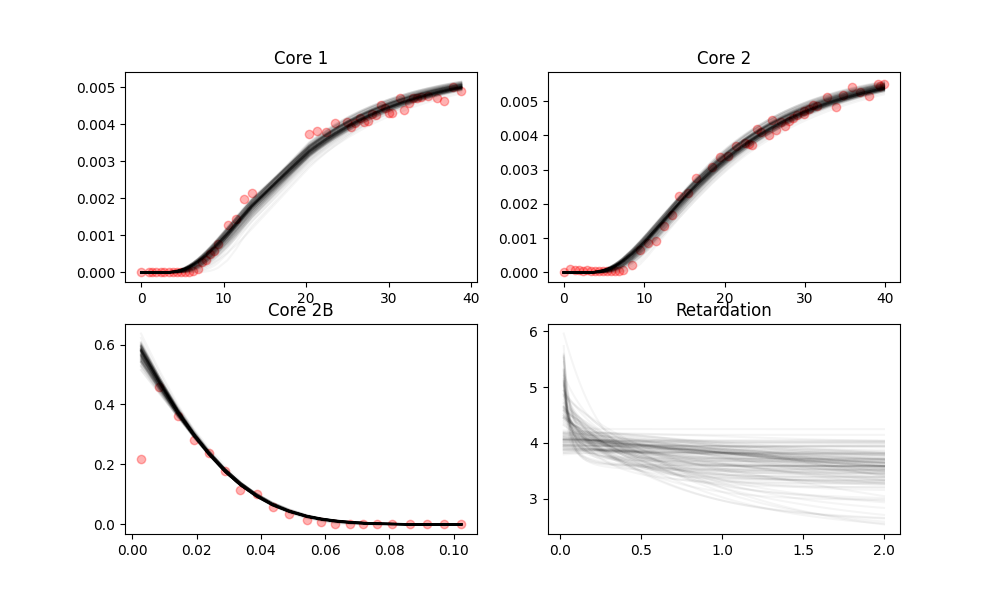

In [15]:
Image.open(img_dir / "finn_fullspan_samples.png")

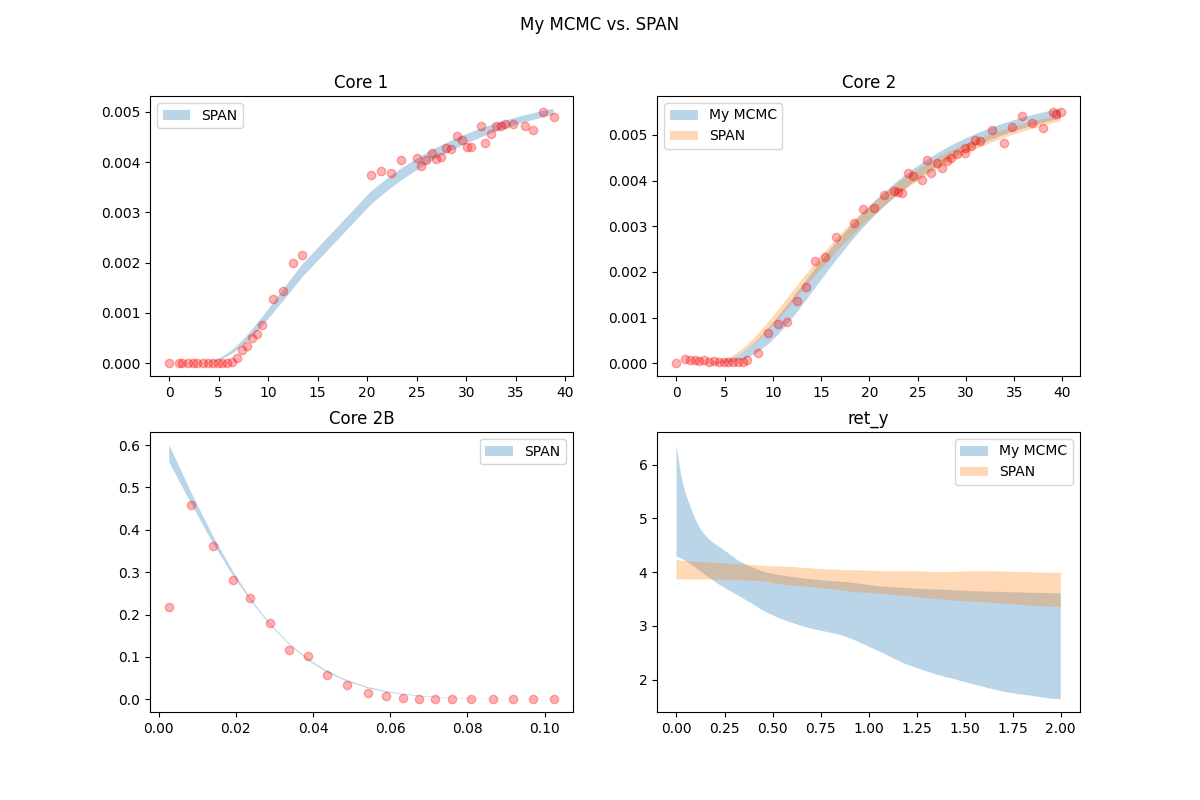

In [16]:
Image.open(img_dir / "finn_My MCMCvsSPAN_PIs.png")


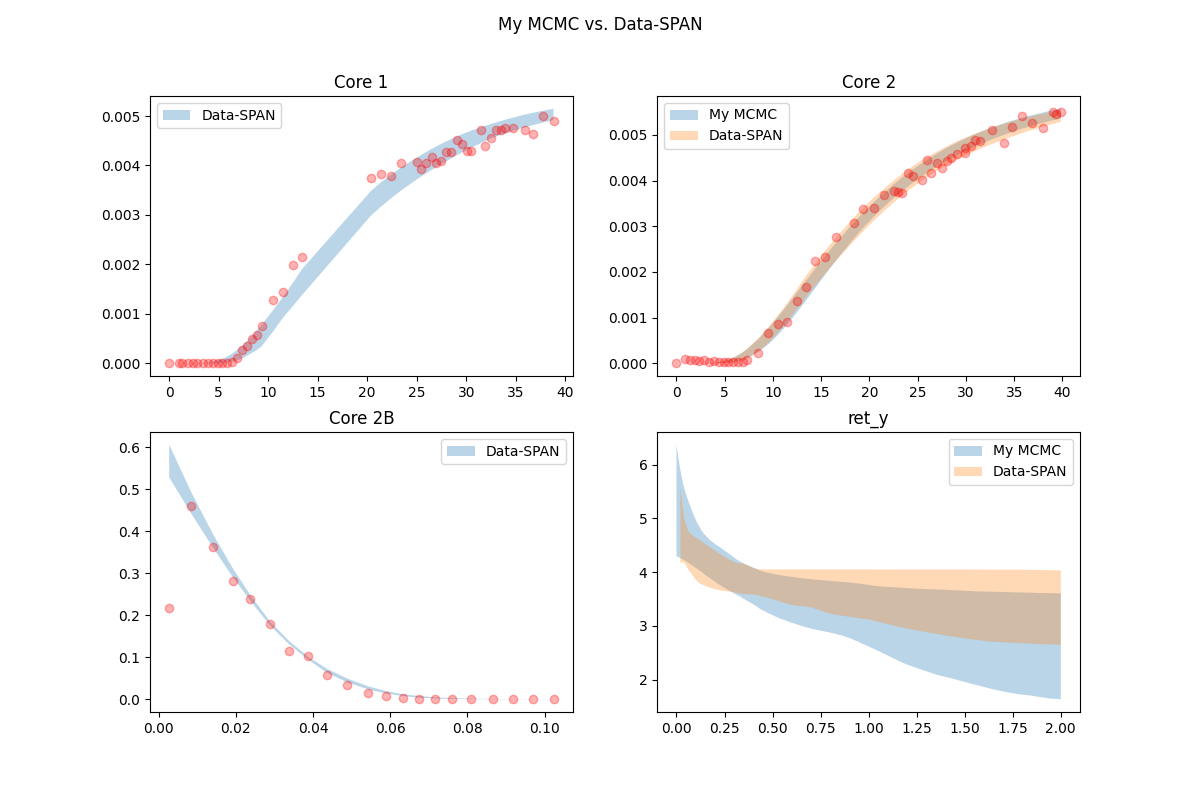

In [17]:
Image.open(img_dir / "finn_My MCMCvsData-SPAN_PIs.png")

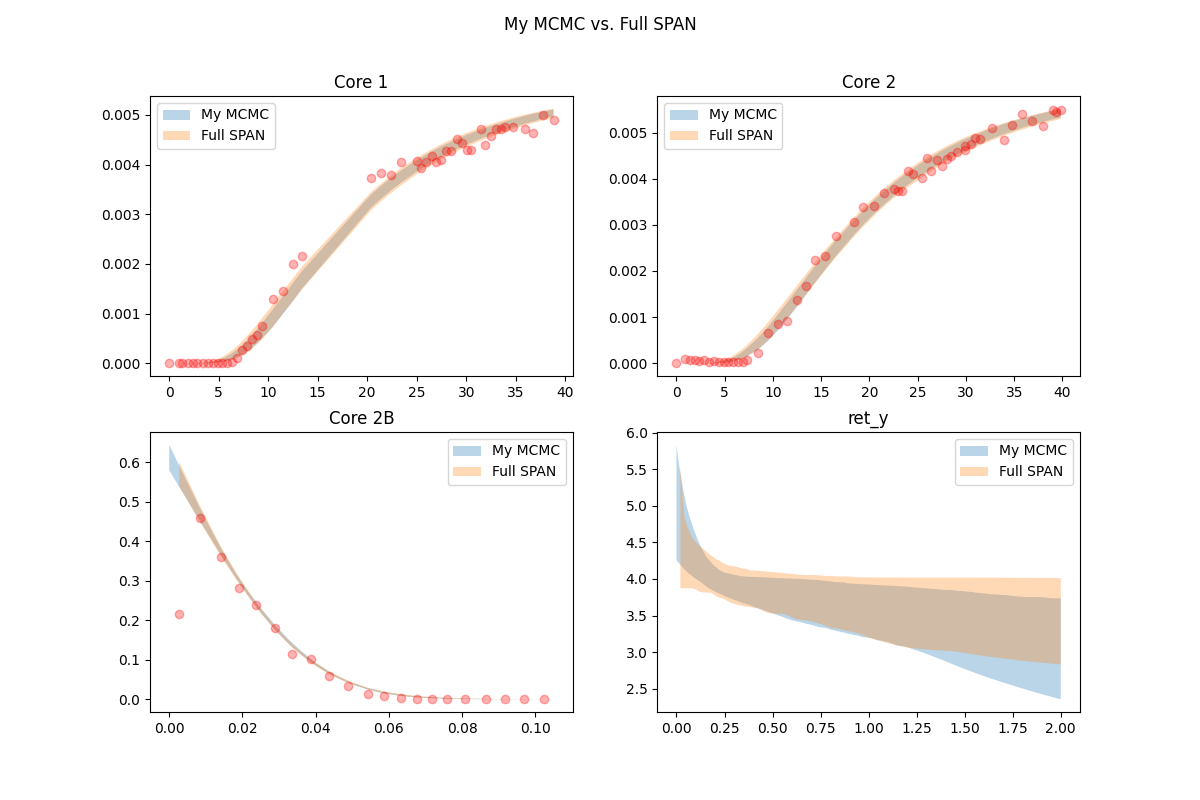

In [18]:
Image.open(img_dir / "finn_My MCMCvsFull SPAN_PIs.png")


# Conclusion
## Summary
## Future Work

# References

# Appendix